In [24]:
#LSTM NN (Long Short Term Memory)

In [4]:
#import packages
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

/Users/ag/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
#view data / explore
#SNP 500 Data
SPY = yf.Ticker("^GSPC")
SPY_data = SPY.history(period="10y", interval="1d") #import 10 years of data with 1 day intervals

print(SPY_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-27 00:00:00-04:00  2119.290039  2125.919922  2107.040039  2108.919922   
2015-04-28 00:00:00-04:00  2108.350098  2116.040039  2094.889893  2114.760010   
2015-04-29 00:00:00-04:00  2112.489990  2113.649902  2097.409912  2106.850098   
2015-04-30 00:00:00-04:00  2105.520020  2105.520020  2077.590088  2085.510010   
2015-05-01 00:00:00-04:00  2087.379883  2108.409912  2087.379883  2108.290039   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-27 00:00:00-04:00  3438750000        0.0           0.0  
2015-04-28 00:00:00-04:00  3546270000        0.0           0.0  
2015-04-29 00:00:00-04:00  4074970000        0.0           0.0  
2015-04-30 00:00:00-04:00  4509680000        0.0           0.0  
2015-05-01 00:00:00-04:00  3379390000     

In [6]:
#DOW Data
dow = yf.Ticker("^DJI")
dow_data = dow.history(period="10y", interval="1d")

print(dow_data.head())

                                   Open          High           Low  \
Date                                                                  
2015-04-27 00:00:00-04:00  18097.890625  18175.560547  18024.660156   
2015-04-28 00:00:00-04:00  18035.900391  18119.650391  17917.359375   
2015-04-29 00:00:00-04:00  18093.689453  18096.460938  17953.689453   
2015-04-30 00:00:00-04:00  18033.330078  18033.330078  17774.890625   
2015-05-01 00:00:00-04:00  17859.269531  18028.890625  17859.269531   

                                  Close     Volume  Dividends  Stock Splits  
Date                                                                         
2015-04-27 00:00:00-04:00  18037.970703  121110000        0.0           0.0  
2015-04-28 00:00:00-04:00  18110.140625  124930000        0.0           0.0  
2015-04-29 00:00:00-04:00  18035.529297  102080000        0.0           0.0  
2015-04-30 00:00:00-04:00  17840.519531  129180000        0.0           0.0  
2015-05-01 00:00:00-04:00  18024.0

In [7]:
#nasdaq data
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(period="10y", interval="1d")

print(nasdaq_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-27 00:00:00-04:00  5104.359863  5119.830078  5053.540039  5060.250000   
2015-04-28 00:00:00-04:00  5063.259766  5075.299805  5006.279785  5055.419922   
2015-04-29 00:00:00-04:00  5028.450195  5053.839844  4999.830078  5023.640137   
2015-04-30 00:00:00-04:00  4996.990234  5015.959961  4921.549805  4941.419922   
2015-05-01 00:00:00-04:00  4966.319824  5005.390137  4962.740234  5005.390137   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-27 00:00:00-04:00  2172470000        0.0           0.0  
2015-04-28 00:00:00-04:00  2032500000        0.0           0.0  
2015-04-29 00:00:00-04:00  1871300000        0.0           0.0  
2015-04-30 00:00:00-04:00  2269290000        0.0           0.0  
2015-05-01 00:00:00-04:00  1854400000     

In [29]:
def preprocessing(df, column='Close', sequence_length=30, test_size=0.1, for_lstm=False):
    df = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[column]])

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)

    if for_lstm:
        X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

    split = int((1 - test_size) * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler


In [30]:
#Apply preproc func to indexes

X_train_spy_lstm, X_test_spy_lstm, y_train_spy_lstm, y_test_spy_lstm, scaler_spy = preprocessing(SPY_data, for_lstm=True)

X_train_dow_lstm, X_test_dow_lstm, y_train_dow_lstm, y_test_dow_lstm, scaler_dow = preprocessing(dow_data, for_lstm=True)

X_train_nasdaq_lstm, X_test_nasdaq_lstm, y_train_nasdaq_lstm, y_test_nasdaq_lstm, scaler_nasdaq = preprocessing(nasdaq_data, for_lstm=True)


In [ ]:
def run_lstm(X_train, X_test, y_train, y_test, scaler, label='', epochs=20, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    predicted = model.predict(X_test)
    predicted_actual = scaler.inverse_transform(predicted.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
    mae = mean_absolute_error(y_test_actual, predicted_actual)sg
    r2 = r2_score(y_test_actual, predicted_actual)

    print(f"LSTM Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, predicted_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}


In [32]:
model_spy_lstm, pred_spy_lstm, y_test_spy_lstm_actual, lstm_metrics_spy = run_lstm(
    X_train_spy_lstm, X_test_spy_lstm, y_train_spy_lstm, y_test_spy_lstm, scaler_spy, label="S&P 500"
)

model_dow_lstm, pred_dow_lstm, y_test_dow_lstm_actual, lstm_metrics_dow = run_lstm(
    X_train_dow_lstm, X_test_dow_lstm, y_train_dow_lstm, y_test_dow_lstm, scaler_dow, label="Dow Jones"
)

model_nasdaq_lstm, pred_nasdaq_lstm, y_test_nasdaq_lstm_actual, lstm_metrics_nasdaq = run_lstm(
    X_train_nasdaq_lstm, X_test_nasdaq_lstm, y_train_nasdaq_lstm, y_test_nasdaq_lstm, scaler_nasdaq, label="NASDAQ"
)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (S&P 500):
RMSE: 215.3683
MAE:  199.1713
R² Score: 0.4631


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (Dow Jones):
RMSE: 870.8533
MAE:  681.4705
R² Score: 0.8137


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (NASDAQ):
RMSE: 458.4835
MAE:  365.8853
R² Score: 0.8495


In [33]:
def plot_predictions(y_actual, y_pred, title='Model Predictions vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', linewidth=2)
    plt.plot(y_pred, label='Predicted Prices', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [34]:
def plot_full_with_predictions(full_data, column, y_test_actual, y_pred, title='Index Forecast (10-Year Overview)', test_size=0.1):
    import matplotlib.pyplot as plt
    import numpy as np

    full_series = full_data[column].values
    total_len = len(full_series)
    test_len = len(y_test_actual)
    train_len = total_len - test_len

    # Create timeline for plotting
    timeline = full_data.index
    full_range = np.arange(total_len)
    test_range = np.arange(train_len, total_len)

    plt.figure(figsize=(14, 6))
    plt.plot(timeline, full_series, label='Full Historical Data', linewidth=2)
    plt.plot(timeline[test_range], y_test_actual.flatten(), label='Actual Test Data', color='green', linewidth=2)
    plt.plot(timeline[test_range], y_pred.flatten(), label='Predicted Data', linestyle='--', color='red', linewidth=2)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Index Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


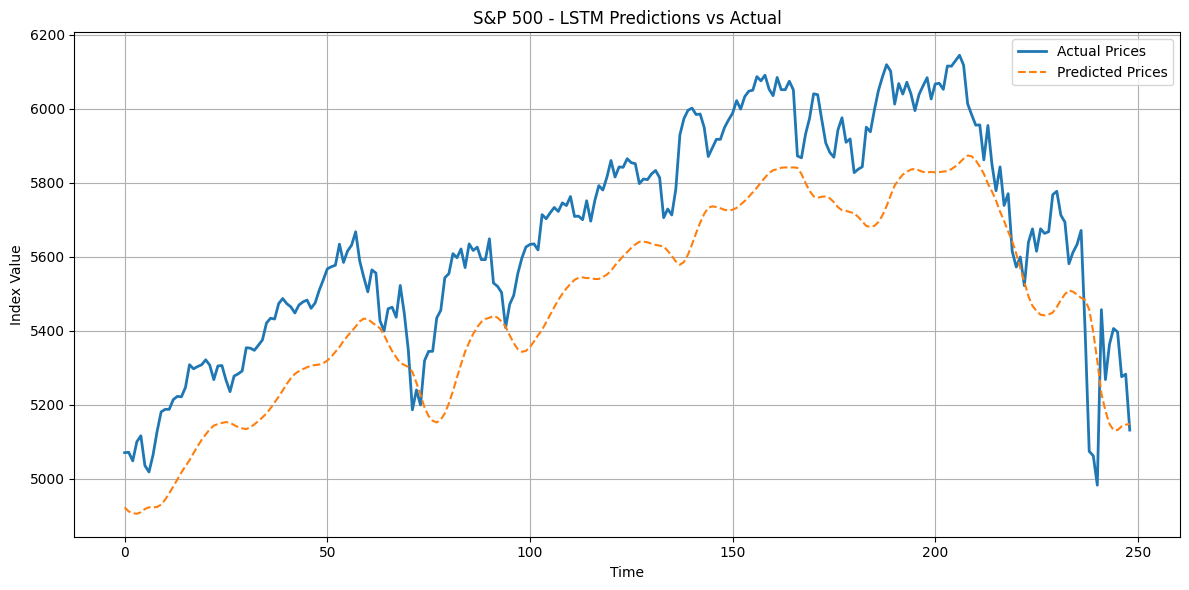

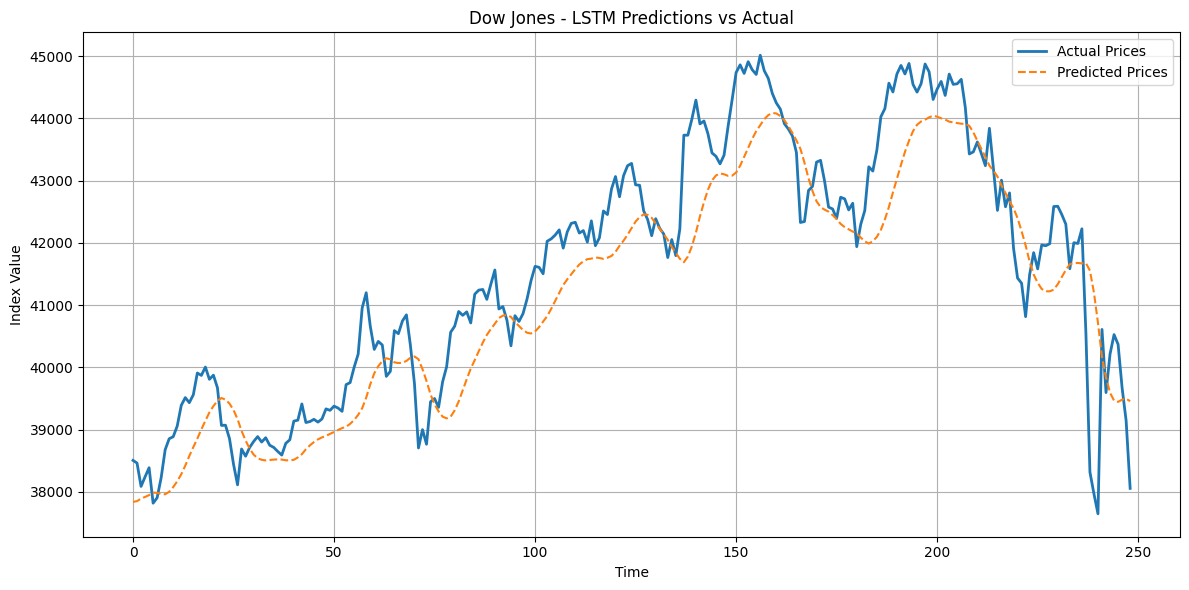

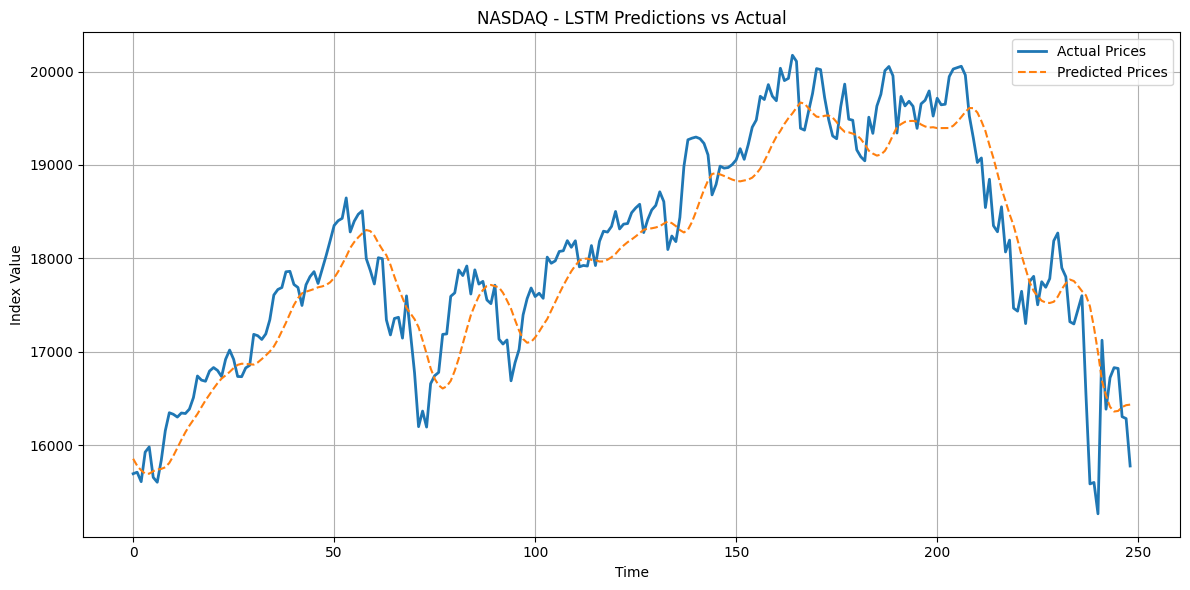

In [35]:
plot_predictions(y_test_spy_lstm_actual, pred_spy_lstm, title="S&P 500 - LSTM Predictions vs Actual")
plot_predictions(y_test_dow_lstm_actual, pred_dow_lstm, title="Dow Jones - LSTM Predictions vs Actual")
plot_predictions(y_test_nasdaq_lstm_actual, pred_nasdaq_lstm, title="NASDAQ - LSTM Predictions vs Actual")


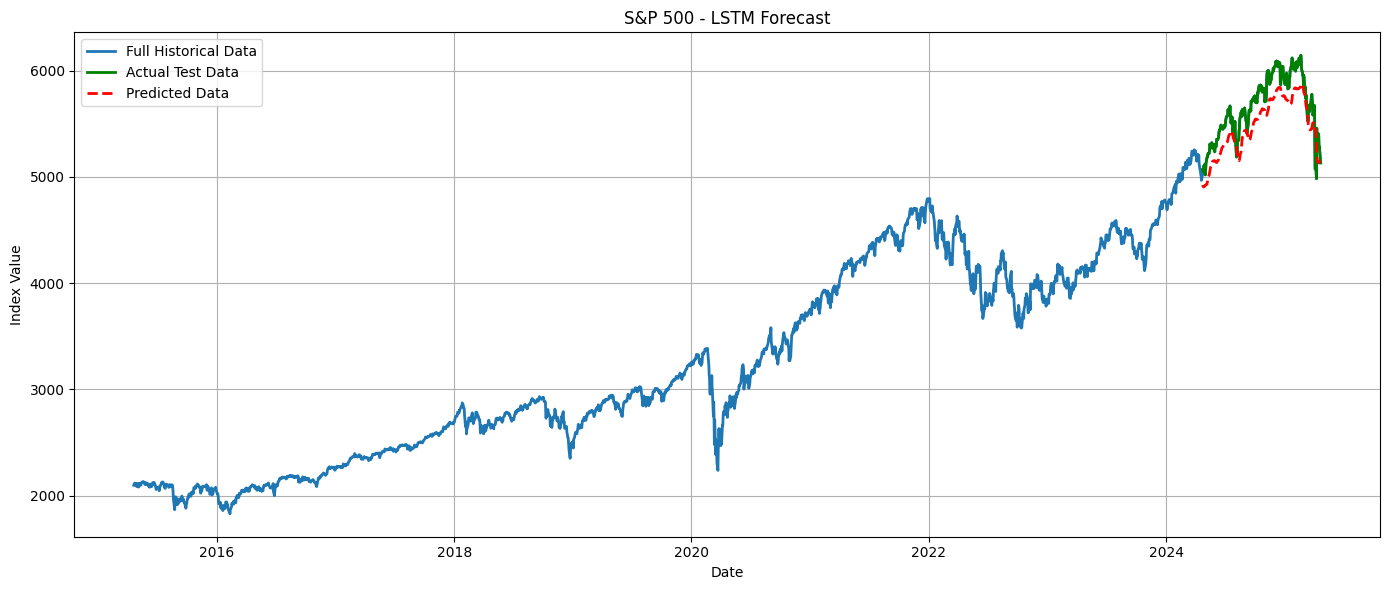

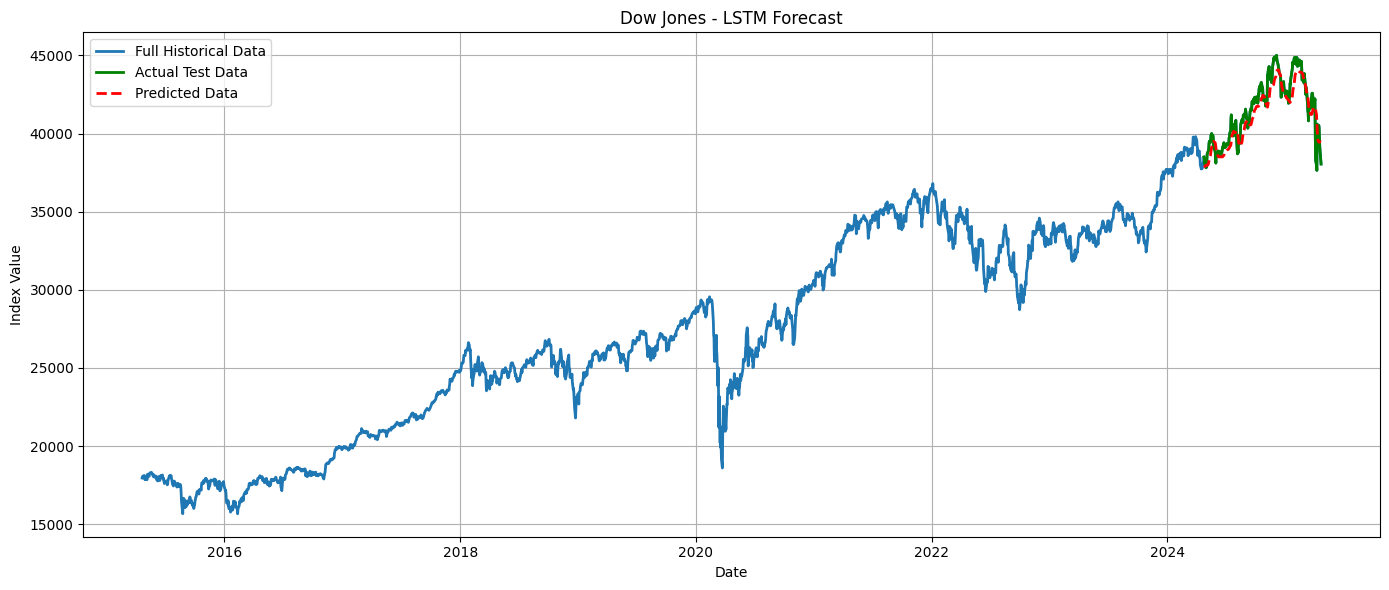

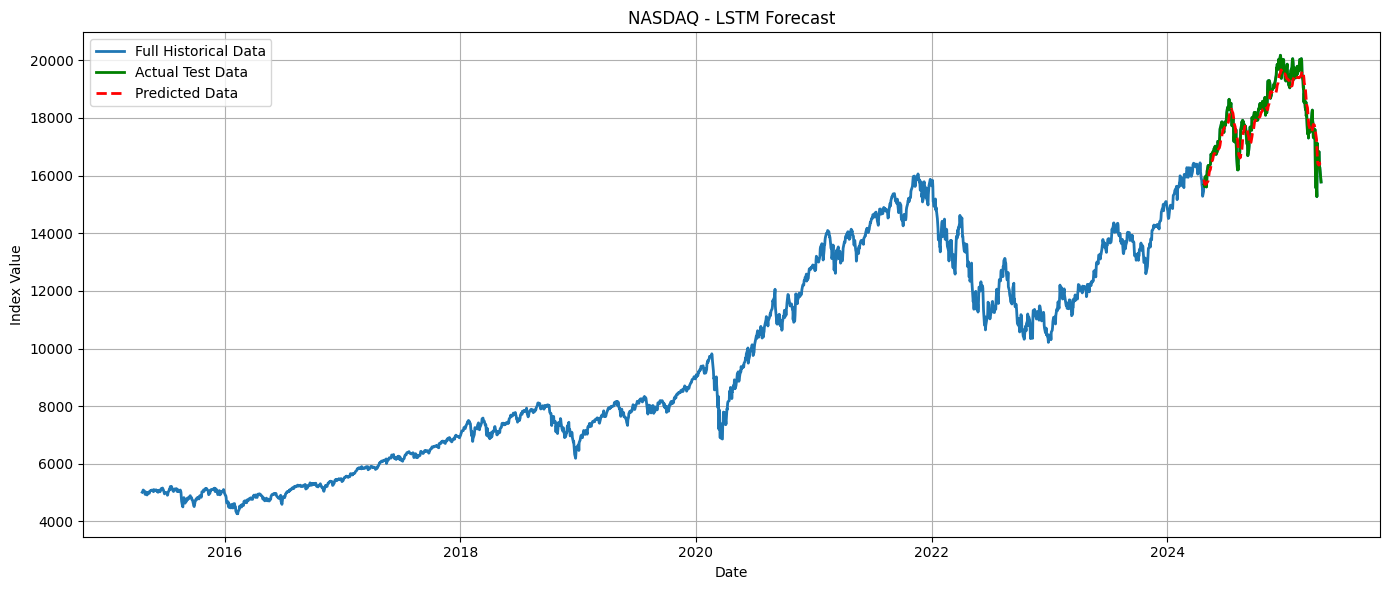

In [36]:
plot_full_with_predictions(SPY_data, 'Close', y_test_spy_lstm_actual, pred_spy_lstm, title='S&P 500 - LSTM Forecast')
plot_full_with_predictions(dow_data, 'Close', y_test_dow_lstm_actual, pred_dow_lstm, title='Dow Jones - LSTM Forecast')
plot_full_with_predictions(nasdaq_data, 'Close', y_test_nasdaq_lstm_actual, pred_nasdaq_lstm, title='NASDAQ - LSTM Forecast')


In [37]:

lstm_metrics_df = pd.DataFrame({
    'S&P 500': {
        'LSTM_RMSE': lstm_metrics_spy['rmse'],
        'LSTM_MAE': lstm_metrics_spy['mae'],
        'LSTM_R2': lstm_metrics_spy['r2'],
    },
    'Dow Jones': {
        'LSTM_RMSE': lstm_metrics_dow['rmse'],
        'LSTM_MAE': lstm_metrics_dow['mae'],
        'LSTM_R2': lstm_metrics_dow['r2'],
    },
    'NASDAQ': {
        'LSTM_RMSE': lstm_metrics_nasdaq['rmse'],
        'LSTM_MAE': lstm_metrics_nasdaq['mae'],
        'LSTM_R2': lstm_metrics_nasdaq['r2'],
    }
}).T # Transpose to have indexes as rows

lstm_metrics_df = lstm_metrics_df.round(4)


In [38]:
lstm_metrics_df.style.set_caption("LSTM Model Performance Across Indexes")


,LSTM_RMSE,LSTM_MAE,LSTM_R2
S&P 500,215.368300,199.171300,0.463100
Dow Jones,870.853300,681.470500,0.813700
NASDAQ,458.483500,365.885300,0.849500


In [39]:
epoch_settings = [20, 50, 75, 100, 150, 200]
metrics_results = []

for epochs in epoch_settings:
    _, _, _, metrics = run_lstm(
        X_train_spy_lstm, X_test_spy_lstm, y_train_spy_lstm, y_test_spy_lstm,
        scaler_spy, label=f"S&P 500 - {epochs} Epochs", epochs=epochs
    )
    metrics_results.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (S&P 500 - 20 Epochs):
RMSE: 134.6897
MAE:  112.5522
R² Score: 0.7900


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
LSTM Metrics (S&P 500 - 50 Epochs):
RMSE: 104.2209
MAE:  84.2728
R² Score: 0.8743


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
LSTM Metrics (S&P 500 - 75 Epochs):
RMSE: 96.4663
MAE:  78.7676
R² Score: 0.8923


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (S&P 500 - 100 Epochs):
RMSE: 110.8286
MAE:  95.8133
R² Score: 0.8578


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
LSTM Metrics (S&P 500 - 150 Epochs):
RMSE: 120.8138
MAE:  108.4067
R² Score: 0.8310


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
LSTM Metrics (S&P 500 - 200 Epochs):
RMSE: 89.9356
MAE:  75.4494
R² Score: 0.9064


In [40]:
metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.sort_values('Epochs').reset_index(drop=True)
print(metrics_df)

   Epochs        RMSE         MAE        R2
0      20  134.689739  112.552152  0.789991
1      50  104.220867   84.272839  0.874259
2      75   96.466343   78.767615  0.892274
3     100  110.828637   95.813320  0.857809
4     150  120.813779  108.406664  0.831033
5     200   89.935627   75.449376  0.906366


In [41]:

metrics_results_dow = []

for epochs in epoch_settings:
    _, _, _, metrics = run_lstm(
        X_train_dow_lstm, X_test_dow_lstm, y_train_dow_lstm, y_test_dow_lstm,
        scaler_dow, label=f"Dow Jones - {epochs} Epochs", epochs=epochs
    )
    metrics_results_dow.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })

metrics_df_dow = pd.DataFrame(metrics_results_dow).sort_values('Epochs').reset_index(drop=True)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (Dow Jones - 20 Epochs):
RMSE: 1115.5637
MAE:  966.2033
R² Score: 0.6942


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
LSTM Metrics (Dow Jones - 50 Epochs):
RMSE: 632.3935
MAE:  440.5625
R² Score: 0.9017


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (Dow Jones - 75 Epochs):
RMSE: 548.6019
MAE:  366.7502
R² Score: 0.9261


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (Dow Jones - 100 Epochs):
RMSE: 671.4135
MAE:  566.1815
R² Score: 0.8892


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (Dow Jones - 150 Epochs):
RMSE: 547.6376
MAE:  439.7803
R² Score: 0.9263


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM Metrics (Dow Jones - 200 Epochs):
RMSE: 502.2159
MAE:  389.7320
R² Score: 0.9380


In [42]:
metrics_results_nasdaq = []

for epochs in epoch_settings:
    _, _, _, metrics = run_lstm(
        X_train_nasdaq_lstm, X_test_nasdaq_lstm, y_train_nasdaq_lstm, y_test_nasdaq_lstm,
        scaler_nasdaq, label=f"NASDAQ - {epochs} Epochs", epochs=epochs
    )
    metrics_results_nasdaq.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })

metrics_df_nasdaq = pd.DataFrame(metrics_results_nasdaq).sort_values('Epochs').reset_index(drop=True)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (NASDAQ - 20 Epochs):
RMSE: 691.1988
MAE:  609.0203
R² Score: 0.6580


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (NASDAQ - 50 Epochs):
RMSE: 643.7316
MAE:  573.7382
R² Score: 0.7033


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (NASDAQ - 75 Epochs):
RMSE: 349.5447
MAE:  267.2301
R² Score: 0.9125


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM Metrics (NASDAQ - 100 Epochs):
RMSE: 334.8207
MAE:  228.0348
R² Score: 0.9197


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM Metrics (NASDAQ - 150 Epochs):
RMSE: 360.2023
MAE:  306.2282
R² Score: 0.9071


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM Metrics (NASDAQ - 200 Epochs):
RMSE: 362.0105
MAE:  308.6521
R² Score: 0.9062


In [43]:
metrics_df.style.set_caption("LSTM Model Performance Across Indexes at Varying Epochs (SNP 500)")


,Epochs,RMSE,MAE,R2
0,20,134.689739,112.552152,0.789991
1,50,104.220867,84.272839,0.874259
2,75,96.466343,78.767615,0.892274
3,100,110.828637,95.813320,0.857809
4,150,120.813779,108.406664,0.831033
5,200,89.935627,75.449376,0.906366


In [44]:
metrics_df_dow.style.set_caption("LSTM Model Performance Across Indexes at Varying Epochs (DOW)")


,Epochs,RMSE,MAE,R2
0,20,1115.563730,966.203298,0.694242
1,50,632.393460,440.562469,0.901743
2,75,548.601863,366.750204,0.926056
3,100,671.413509,566.181476,0.889244
4,150,547.637555,439.780324,0.926316
5,200,502.215860,389.731959,0.938032


In [45]:
metrics_df_nasdaq.style.set_caption("LSTM Model Performance Across Indexes at Varying Epochs (NASDAQ)")


,Epochs,RMSE,MAE,R2
0,20,691.198827,609.020261,0.657957
1,50,643.731568,573.738171,0.703323
2,75,349.544703,267.230128,0.912526
3,100,334.820693,228.034803,0.919740
4,150,360.202305,306.228225,0.907110
5,200,362.010547,308.652128,0.906175


In [46]:
import pandas as pd
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def run_lstm_comparison_for_indexes(X_train_dict, X_test_dict, y_train_dict, y_test_dict, scaler_dict, indexes, label='', epochs=150, optimizers=None, batch_sizes=None):
    if optimizers is None:
        optimizers = ['adam', 'rmsprop', 'sgd']
    if batch_sizes is None:
        batch_sizes = [32, 64, 128]

    results = []

    # Loop through each index (S&P 500, Dow Jones, Nasdaq)
    for index in indexes:
        X_train = X_train_dict[index]
        X_test = X_test_dict[index]
        y_train = y_train_dict[index]
        y_test = y_test_dict[index]
        scaler = scaler_dict[index]

        print(f"Evaluating model for {index}...")

        for optimizer in optimizers:
            for batch_size in batch_sizes:
                print(f"Training with optimizer: {optimizer} and batch_size: {batch_size}")
                model = Sequential()
                model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
                model.add(Dropout(0.2))
                model.add(LSTM(units=50, return_sequences=False))
                model.add(Dropout(0.2))
                model.add(Dense(units=1))

                model.compile(optimizer=optimizer, loss='mean_squared_error')
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

                predicted = model.predict(X_test)
                predicted_actual = scaler.inverse_transform(predicted.reshape(-1, 1))
                y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

                rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
                mae = mean_absolute_error(y_test_actual, predicted_actual)
                r2 = r2_score(y_test_actual, predicted_actual)

                print(f"RMSE: {rmse:.4f}")
                print(f"MAE:  {mae:.4f}")
                print(f"R² Score: {r2:.4f}")

                results.append({
                    'index': index,
                    'optimizer': optimizer,
                    'batch_size': batch_size,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2
                })

    results_df = pd.DataFrame(results)
    
    # Apply styling
    styled_df = results_df.style.set_caption("LSTM Model Performance Across Indexes at 100 neurons")
    
    # Display styled DataFrame
    return styled_df


In [47]:
X_train_dict = {
    'S&P 500': X_train_spy_lstm,
    'Dow Jones': X_train_dow_lstm,
    'Nasdaq': X_train_nasdaq_lstm
}

X_test_dict = {
    'S&P 500': X_test_spy_lstm,
    'Dow Jones': X_test_dow_lstm,
    'Nasdaq': X_test_nasdaq_lstm
}

y_train_dict = {
    'S&P 500': y_train_spy_lstm,
    'Dow Jones': y_train_dow_lstm,
    'Nasdaq': y_train_nasdaq_lstm
}

y_test_dict = {
    'S&P 500': y_test_spy_lstm,
    'Dow Jones': y_test_dow_lstm,
    'Nasdaq': y_test_nasdaq_lstm
}

scaler_dict = {
    'S&P 500': scaler_spy,
    'Dow Jones': scaler_dow,
    'Nasdaq': scaler_nasdaq
}

indexes = ['S&P 500', 'Dow Jones', 'Nasdaq']
styled_results = run_lstm_comparison_for_indexes(X_train_dict, X_test_dict, y_train_dict, y_test_dict, scaler_dict, indexes)



Evaluating model for S&P 500...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 99.9057
MAE:  86.8880
R² Score: 0.8845
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 127.9686
MAE:  112.4218
R² Score: 0.8104
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 101.0635
MAE:  76.6992
R² Score: 0.8818
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 92.4991
MAE:  70.1143
R² Score: 0.9010
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 146.3811
MAE:  128.7048
R² Score: 0.7520
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 105.3716
MAE:  71.0491
R² Score: 0.8715
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 132.7530
MAE:  106.4382
R² Score: 0.7960
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 216.7074
MAE:  192.4816
R² Score: 0.4564
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 220.7708
MAE:  196.4211
R² Score: 0.4358
Evaluating model for Dow Jones...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 532.4395
MAE:  419.5961
R² Score: 0.9303
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 520.2053
MAE:  353.5378
R² Score: 0.9335
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 689.8609
MAE:  518.1229
R² Score: 0.8831
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 603.9430
MAE:  420.1483
R² Score: 0.9104
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 675.6180
MAE:  473.6459
R² Score: 0.8879
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 974.2226
MAE:  759.9010
R² Score: 0.7668
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
RMSE: 992.8222
MAE:  781.1806
R² Score: 0.7578
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 1344.9694
MAE:  1143.7873
R² Score: 0.5556
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 1533.6017
MAE:  1319.1244
R² Score: 0.4222
Evaluating model for Nasdaq...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RMSE: 295.5575
MAE:  232.6717
R² Score: 0.9375
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 332.9816
MAE:  262.0349
R² Score: 0.9206
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RMSE: 371.0415
MAE:  284.9762
R² Score: 0.9014
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 416.6283
MAE:  302.7762
R² Score: 0.8757
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 401.6611
MAE:  324.0619
R² Score: 0.8845
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE: 464.4667
MAE:  333.1492
R² Score: 0.8456
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 711.7754
MAE:  624.4353
R² Score: 0.6373
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RMSE: 859.6780
MAE:  760.6033
R² Score: 0.4709
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 716.2628
MAE:  629.3061
R² Score: 0.6327


In [48]:
styled_results

,index,optimizer,batch_size,rmse,mae,r2
0,S&P 500,adam,32,99.905747,86.888015,0.884456
1,S&P 500,adam,64,127.968600,112.421830,0.810428
2,S&P 500,adam,128,101.063482,76.699160,0.881762
3,S&P 500,rmsprop,32,92.499130,70.114321,0.900953
4,S&P 500,rmsprop,64,146.381111,128.704837,0.751951
5,S&P 500,rmsprop,128,105.371562,71.049112,0.871467
6,S&P 500,sgd,32,132.752988,106.438186,0.795988
7,S&P 500,sgd,64,216.707428,192.481557,0.456355
8,S&P 500,sgd,128,220.770774,196.421059,0.435776
9,Dow Jones,adam,32,532.439520,419.596135,0.930349


In [ ]:
#Feature Engineering

In [9]:
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

def preprocessing_with_indicators(df, sequence_length=30, test_size=0.1, for_lstm=True):
    df = df.copy()

    # Calculate indicators
    df['BB_Mean'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['BB_Mean'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_Lower'] = df['BB_Mean'] - 2 * df['Close'].rolling(window=20).std()
    df['RSI'] = compute_rsi(df['Close'], window=14)
    df['ROC'] = df['Close'].pct_change(periods=5) * 100
    df['Diff'] = df['Close'].diff()
    df['Pct_Change'] = df['Close'].pct_change() * 100

    df = df.dropna()

    feature_cols = ['Close', 'BB_Mean', 'BB_Upper', 'BB_Lower', 'RSI', 'ROC', 'Diff', 'Pct_Change']

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[feature_cols])

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)

    if not for_lstm:
        X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

    split = int((1 - test_size) * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

In [10]:
X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy = preprocessing_with_indicators(SPY_data)
X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow = preprocessing_with_indicators(dow_data)
X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq = preprocessing_with_indicators(nasdaq_data)


In [14]:
def run_lstm(X_train, X_test, y_train, y_test, scaler, label='', epochs=100, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    predicted = model.predict(X_test)
    predicted_actual = scaler.inverse_transform(
        np.hstack((predicted, np.zeros((predicted.shape[0], scaler.scale_.shape[0]-1))))
    )[:,0]

    y_test_actual = scaler.inverse_transform(
        np.hstack((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaler.scale_.shape[0]-1))))
    )[:,0]

    rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
    mae = mean_absolute_error(y_test_actual, predicted_actual)
    r2 = r2_score(y_test_actual, predicted_actual)

    print(f"LSTM Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, predicted_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}


In [15]:
model_spy, pred_spy, y_actual_spy, metrics_spy = run_lstm(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label="S&P 500")
model_dow, pred_dow, y_actual_dow, metrics_dow = run_lstm(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label="Dow Jones")
model_nasdaq, pred_nasdaq, y_actual_nasdaq, metrics_nasdaq = run_lstm(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label="NASDAQ")


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (S&P 500):
RMSE: 153.8933
MAE:  138.6580
R² Score: 0.7024


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Metrics (Dow Jones):
RMSE: 472.0191
MAE:  329.6732
R² Score: 0.9427


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM Metrics (NASDAQ):
RMSE: 493.9692
MAE:  415.3258
R² Score: 0.8124


In [16]:
lstm_metrics_df = pd.DataFrame({
    'S&P 500': metrics_spy,
    'Dow Jones': metrics_dow,
    'NASDAQ': metrics_nasdaq
}).T.round(4)

print(lstm_metrics_df)


               rmse       mae      r2
S&P 500    153.8933  138.6580  0.7024
Dow Jones  472.0191  329.6732  0.9427
NASDAQ     493.9692  415.3258  0.8124
